<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Clustering


### Contexto del Problema

Eres un científico de datos contratado por una federación deportiva internacional que desea mejorar sus programas de entrenamiento personalizados. La federación maneja una gran variedad de atletas que participan en diferentes disciplinas deportivas, y cada uno tiene necesidades de entrenamiento y desarrollo únicas. Para maximizar el rendimiento y mejorar la efectividad de los programas de entrenamiento, la federación quiere segmentar a sus atletas en grupos homogéneos basados en sus características físicas, habilidades y comportamientos de entrenamiento.


### Los datos

- **name**: Nombre del atleta. Es una variable categórica que identifica a cada atleta de manera única.

- **gender**: Género del atleta. Es una variable categórica que indica si el atleta es masculino ("Male") o femenino ("Female").

- **age**: Edad del atleta. Es una variable numérica que representa la edad del atleta en años.

- **height**: Altura del atleta. Es una variable numérica que representa la altura del atleta en centímetros.

- **nationality**: Nacionalidad del atleta. Es una variable categórica que indica el país de origen del atleta.

- **weight**: Peso del atleta. Es una variable numérica que representa el peso del atleta en kilogramos.

- **sports**: Deportes que practica el atleta. Es una variable categórica que puede contener múltiples valores (deportes) separados por comas.

- **hours_per_day**: Horas de entrenamiento por día. Es una variable numérica que indica el número promedio de horas que el atleta entrena cada día.

- **strength**: Fuerza del atleta. Es una variable numérica que representa la evaluación de la fuerza del atleta en una escala (por ejemplo, de 1 a 10).

- **agility**: Agilidad del atleta. Es una variable numérica que representa la evaluación de la agilidad del atleta en una escala (por ejemplo, de 1 a 10).

- **mental**: Capacidad mental del atleta. Es una variable numérica que representa la evaluación de la capacidad mental del atleta en una escala (por ejemplo, de 1 a 10).

- **federation**: Federación a la que pertenece el atleta. Es una variable categórica que indica la organización deportiva a la que está afiliado el atleta.

- **year_start**: Año de inicio. Es una variable numérica que indica el año en que el atleta comenzó su carrera o se unió a la federación.

- **rank**: Rango del atleta. Es una variable numérica que representa la posición o clasificación del atleta en su disciplina o federación.


### Objetivo del Ejercicio

El objetivo principal de este ejercicio es que los alumnos practiquen y desarrollen habilidades en el análisis de datos, preprocesamiento y técnicas de clustering aplicadas a un problema real en el ámbito deportivo. Al completar este ejercicio, los alumnos deberán ser capaces de:

1. **Realizar un Análisis Exploratorio de Datos (EDA)**:
    - Comprender la estructura y distribución de los datos.
    - Identificar patrones y relaciones significativas entre las variables.
    - Manejar valores faltantes y atípicos de manera efectiva.
    - Visualizar las características más relevantes.

2. **Preprocesar los Datos de Manera Adecuada**:
    - Convertir variables categóricas en variables numéricas.
    - Escalar las variables numéricas para asegurar una contribución equitativa al análisis de clustering.
    - Seleccionar las características más relevantes que contribuirán al análisis de clustering.

3. **Aplicar Técnicas de Clustering para Segmentar a los Atletas**:
    - Probar diferentes métodos de clustering (e.g., K-means, DBSCAN, Hierarchical Clustering) para identificar el más adecuado para los datos proporcionados.
    - Determinar el número óptimo de clusters utilizando métodos como el codo (Elbow Method) o la silueta (Silhouette Score).
    - Visualizar los clusters obtenidos y analizar sus características distintivas.

4. **Extraer Conclusiones y Proporcionar Recomendaciones de Entrenamiento**:
    - Describir las características principales de cada cluster identificado.
    - Proporcionar recomendaciones prácticas y accionables para personalizar los programas de entrenamiento para cada grupo de atletas.
¡

---
---
## Importamos los datos

In [146]:
%load_ext autoreload
%autoreload 2

from config import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
df = pd.read_csv('../datos/WrestlingWorldTournament.csv', index_col=0).reset_index(drop=True)
df.sample(3)

name  gender  age  height nationality  weight  \
17        Angela Bondy  Female   19  178.50      France      92   
117     David Calderon    Male   39  177.00     England      90   
48   Beverly Rodriguez  Female   34  159.50       Japan      72   

                               sports  hours_per_day  strength  agility  \
17          Boxing, Judo, Kick-Boxing              4         7        7   
117  Boxing, Karate, Kick-Boxing, MMA              5         7        8   
48                Boxing, Karate, MMA              4         4        9   

     mental                     federation  year_start  rank  
17        5  World Wrestling Entertainment        2017   303  
117       6  World Wrestling Entertainment        1998    12  
48        7  World Wrestling Entertainment        2003    89

---
---
## Exploración Inicial Datos

In [148]:
sup_prep.exploracion_datos(df)

El número de filas es 500 y el número de columnas es 14

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Las principales estadísticas de las variables númericas son:


count    mean    std     min     25%     50%     75%     max
age           500.00   31.15   5.44   18.00   27.00   31.00   35.00   53.00
height        500.00  174.86   9.47  152.00  167.50  174.00  181.62  202.00
weight        500.00   89.69  11.08   65.00   81.00   89.00   98.00  123.00
hours_per_day 500.00    3.06   1.38    0.00    2.00    3.00    4.00    8.00
strength      500.00    6.15   1.57    2.00    5.00    6.00    7.00   10.00
agility       500.00    7.15   1.46    3.00    6.00    7.00    8.00   10.00
mental        500.00    6.73   1.20    3.00    6.00    7.00    8.00   10.00
year_start    500.00 2007.13   6.33 1986.00 2003.00 2007.00 2011.00 2021.00
rank          500.00  250.50 144.48    1.00  125.75  250.50  375.25  500.00


----------

Las principales estadísticas de las variables categóricas son:


count unique                   top freq
name          500    500           Aaron Peavy    1
gender        500      2                Female  265
nationality   500      8                France  118
sports        500     31                Karate   42
federation    500      3  Fight Zone Wrestling  206


----------

Los columnas con valores nulos y sus porcentajes son: 


Empty DataFrame
Columns: [%_nulos]
Index: []


----------

Valores unicos que las variables


index    0
0            name  500
1          gender    2
2             age   30
3          height   83
4     nationality    8
5          weight   53
6          sports   31
7   hours_per_day    9
8        strength    9
9         agility    8
10         mental    8
11     federation    3
12     year_start   33
13           rank  500

#### ya de primeras, vamos a quitar el nombre ya que no nos aporta información y nos va a molestar a la hora de plotear nuestras variables categóricas.

In [149]:
df.drop(columns=['name'], inplace=True)

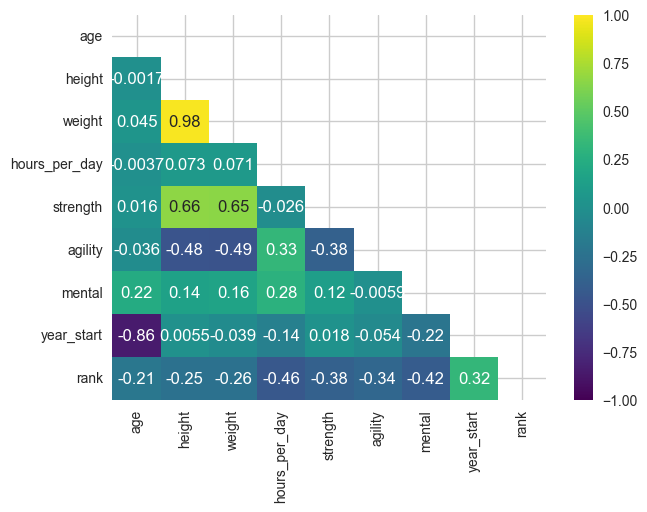

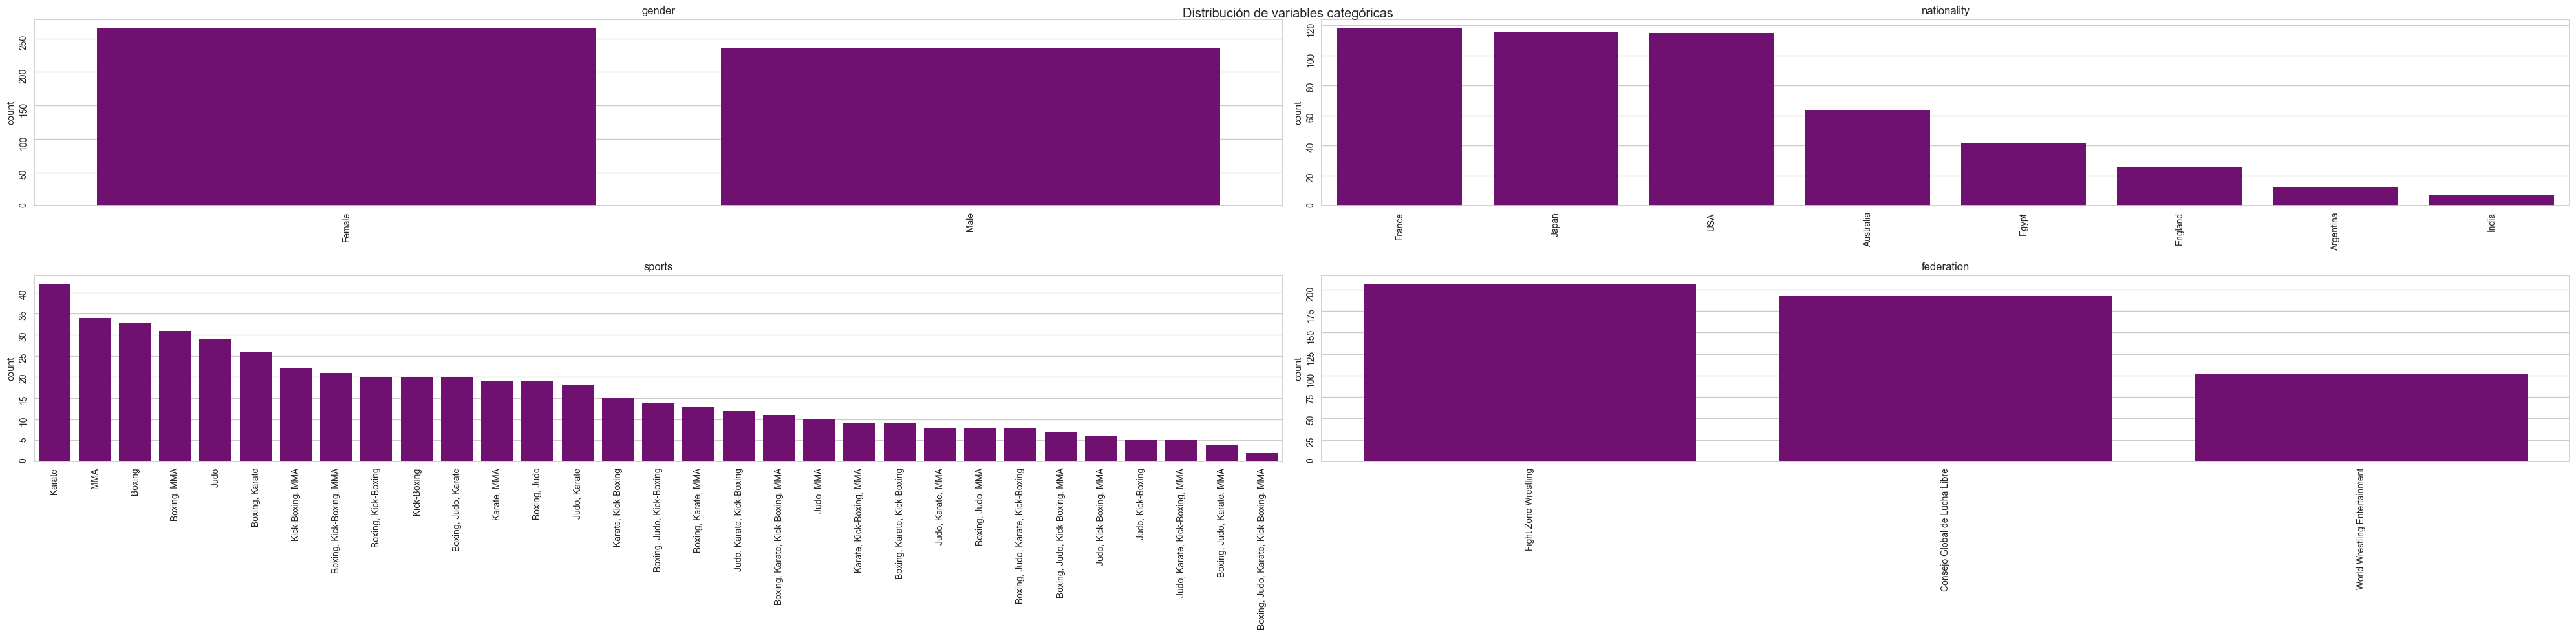

In [150]:
vis = sup_prep.Visualizador(df)
vis.correlacion()
vis.plot_categoricas(color='purple')

9it [00:00, 28.13it/s]


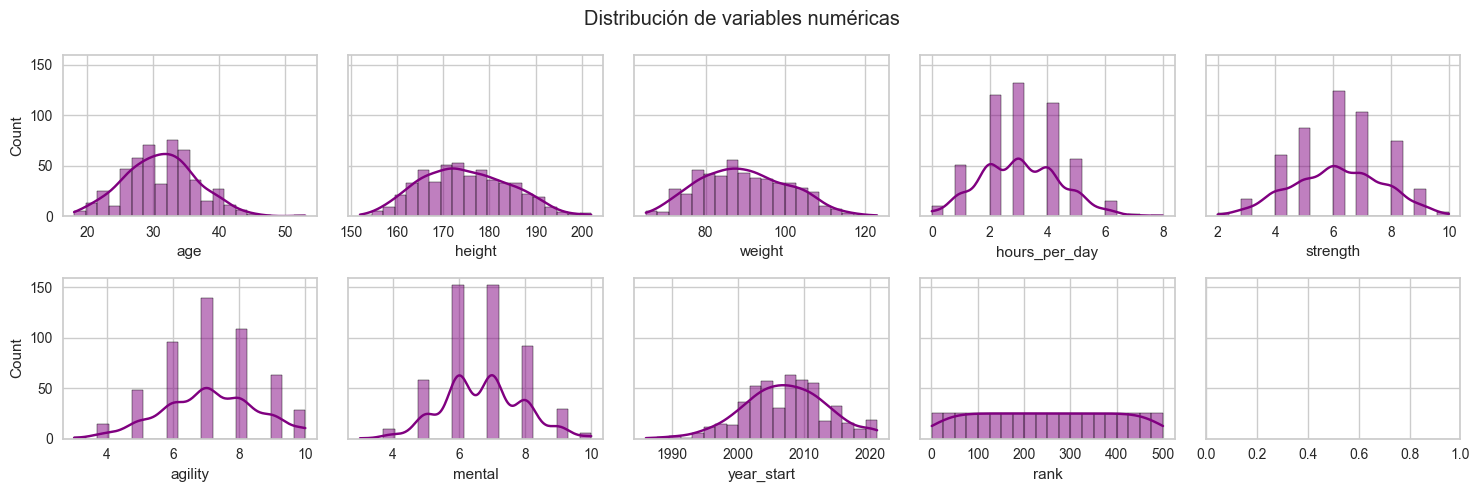

In [151]:
vis.plot_numericas(color='purple', kde=True)

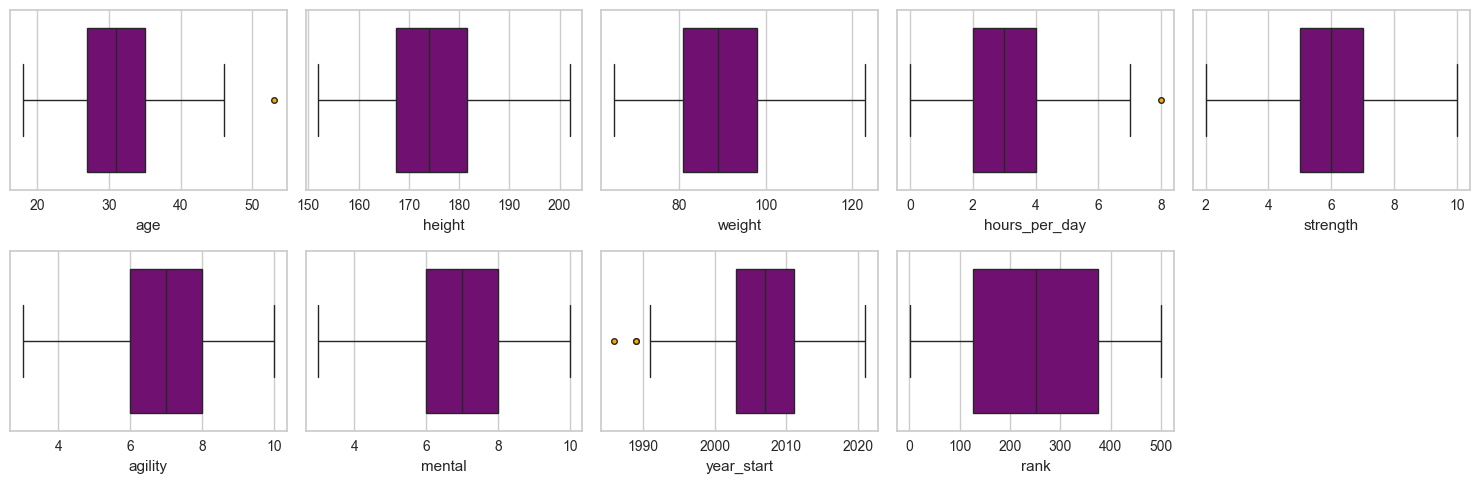

In [152]:
vis.deteccion_outliers(color='purple')

#### Investigamos los outlayers que tenemos en la edad

In [153]:
df_people_over_35 = df[df['age'] > 35]
df_people_over_35.head()

gender  age  height nationality  weight          sports  hours_per_day  \
0   Female   41  165.00     England      82     Boxing, MMA              3   
1     Male   36  185.00       Japan     100            Judo              0   
3     Male   39  187.50       Japan     107            Judo              3   
6     Male   39  178.00         USA      93          Karate              2   
12  Female   42  180.00         USA      98  Boxing, Karate              4   

    strength  agility  mental                     federation  year_start  rank  
0          7        8       7           Fight Zone Wrestling        1989    42  
1          8        5       9  World Wrestling Entertainment        2006   161  
3          7        6       8           Fight Zone Wrestling        2003   252  
6          7        5       6  Consejo Global de Lucha Libre        2000   418  
12         4        7       8  Consejo Global de Lucha Libre        1996   339

<Axes: xlabel='age'>

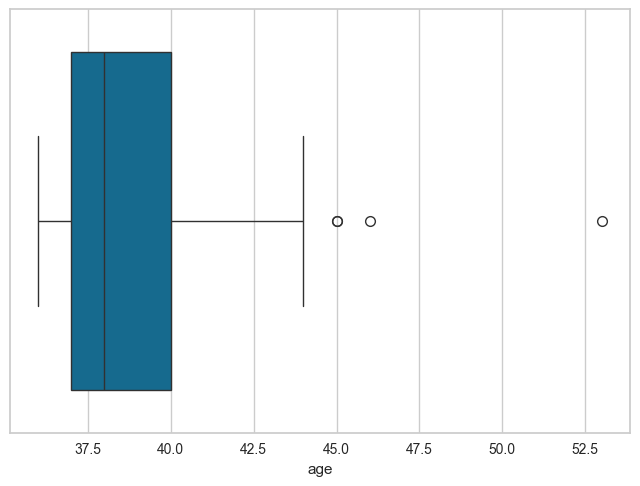

In [154]:
sns.boxplot(x=df_people_over_35['age'])

<Axes: xlabel='age', ylabel='Count'>

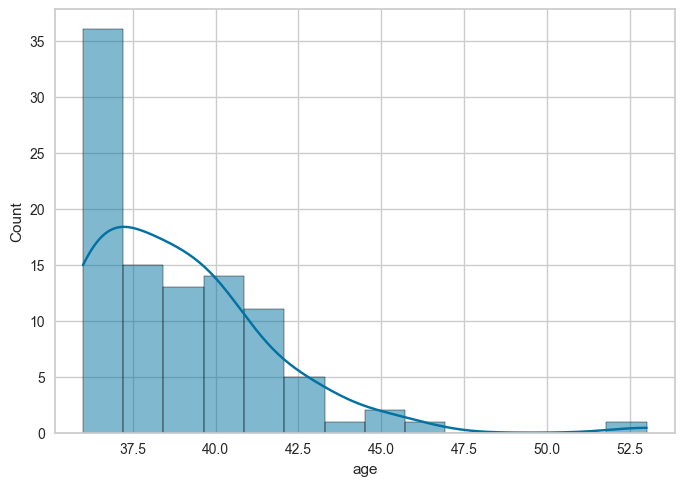

In [155]:
sns.histplot(x=df_people_over_35['age'], kde=True)

In [156]:
df_people_over_45 = df_people_over_35[df_people_over_35['age'] > 45]
df_people_over_45

gender  age  height nationality  weight          sports  hours_per_day  \
116    Male   46  186.50         USA     104  Boxing, Karate              3   
324  Female   53  171.00       Japan      87            Judo              3   

     strength  agility  mental                     federation  year_start  \
116         7        4       8  Consejo Global de Lucha Libre        1997   
324         5        9       6           Fight Zone Wrestling        1986   

     rank  
116   319  
324   232

#### (dado que aunque son mayores parecen buenos deportistas y tienen sentido, vamos a dejar al modelo que los clasifique el y luego ya podemos probar a quitarlos)

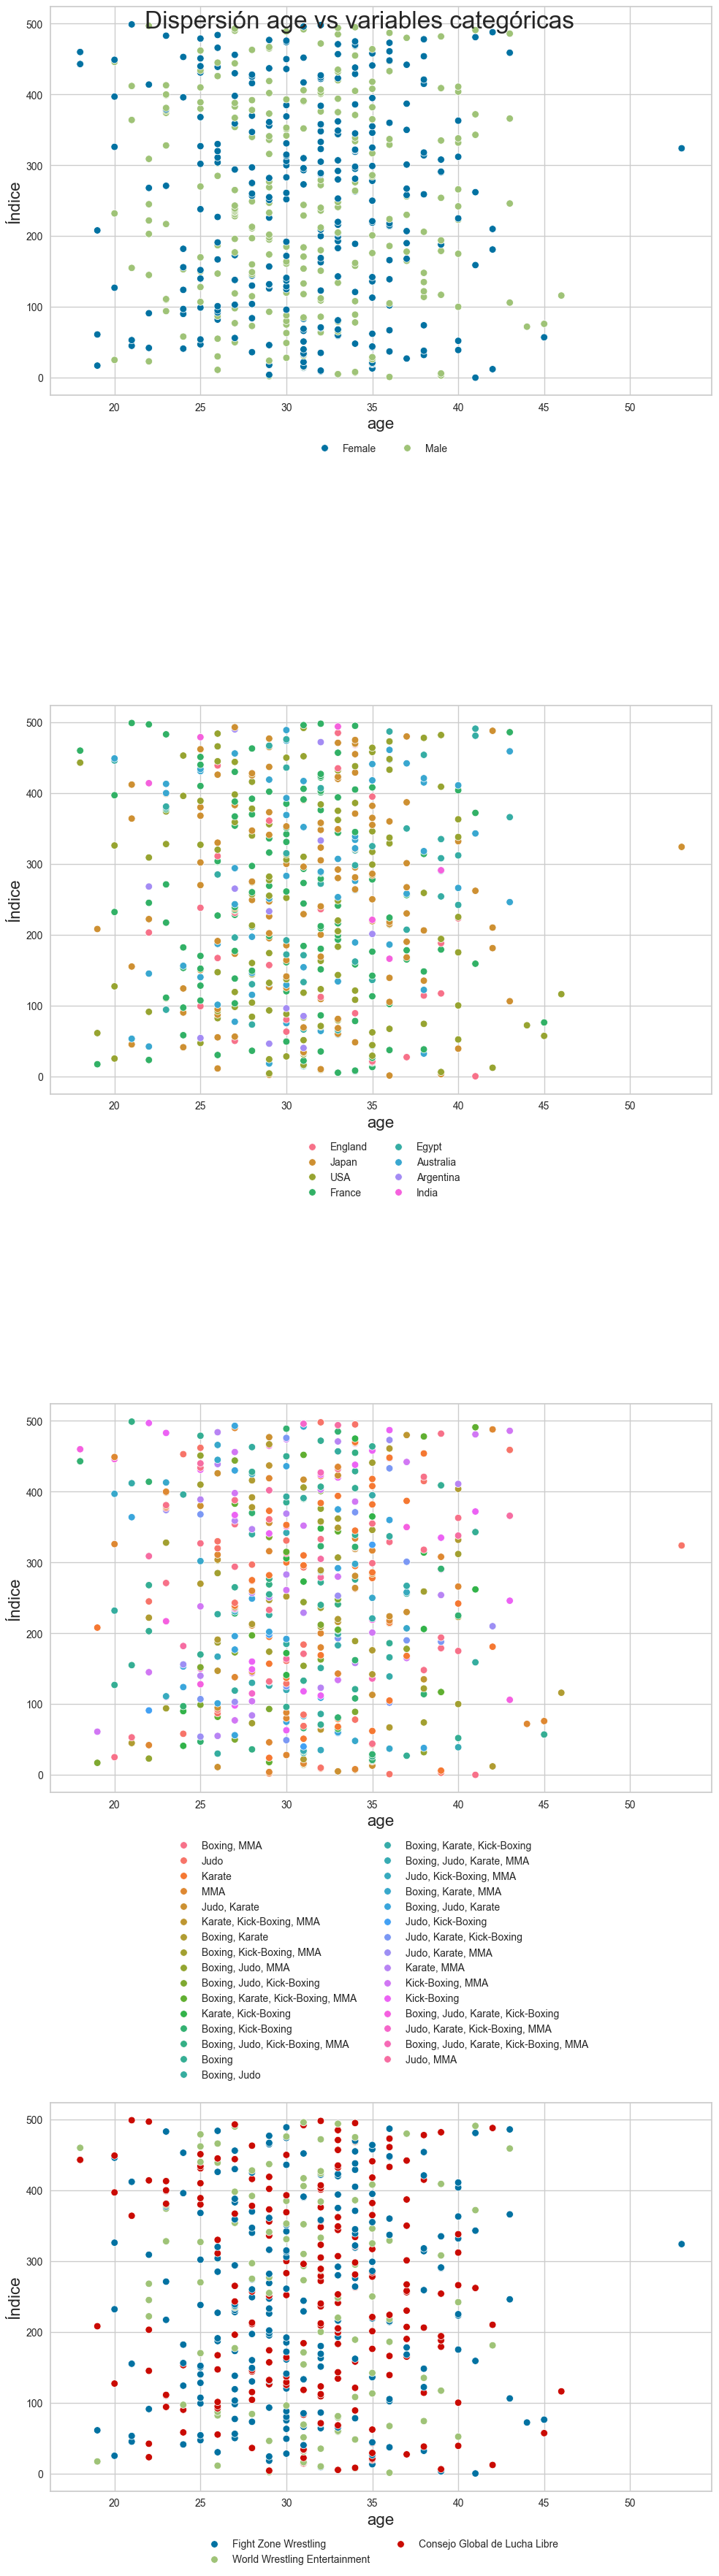

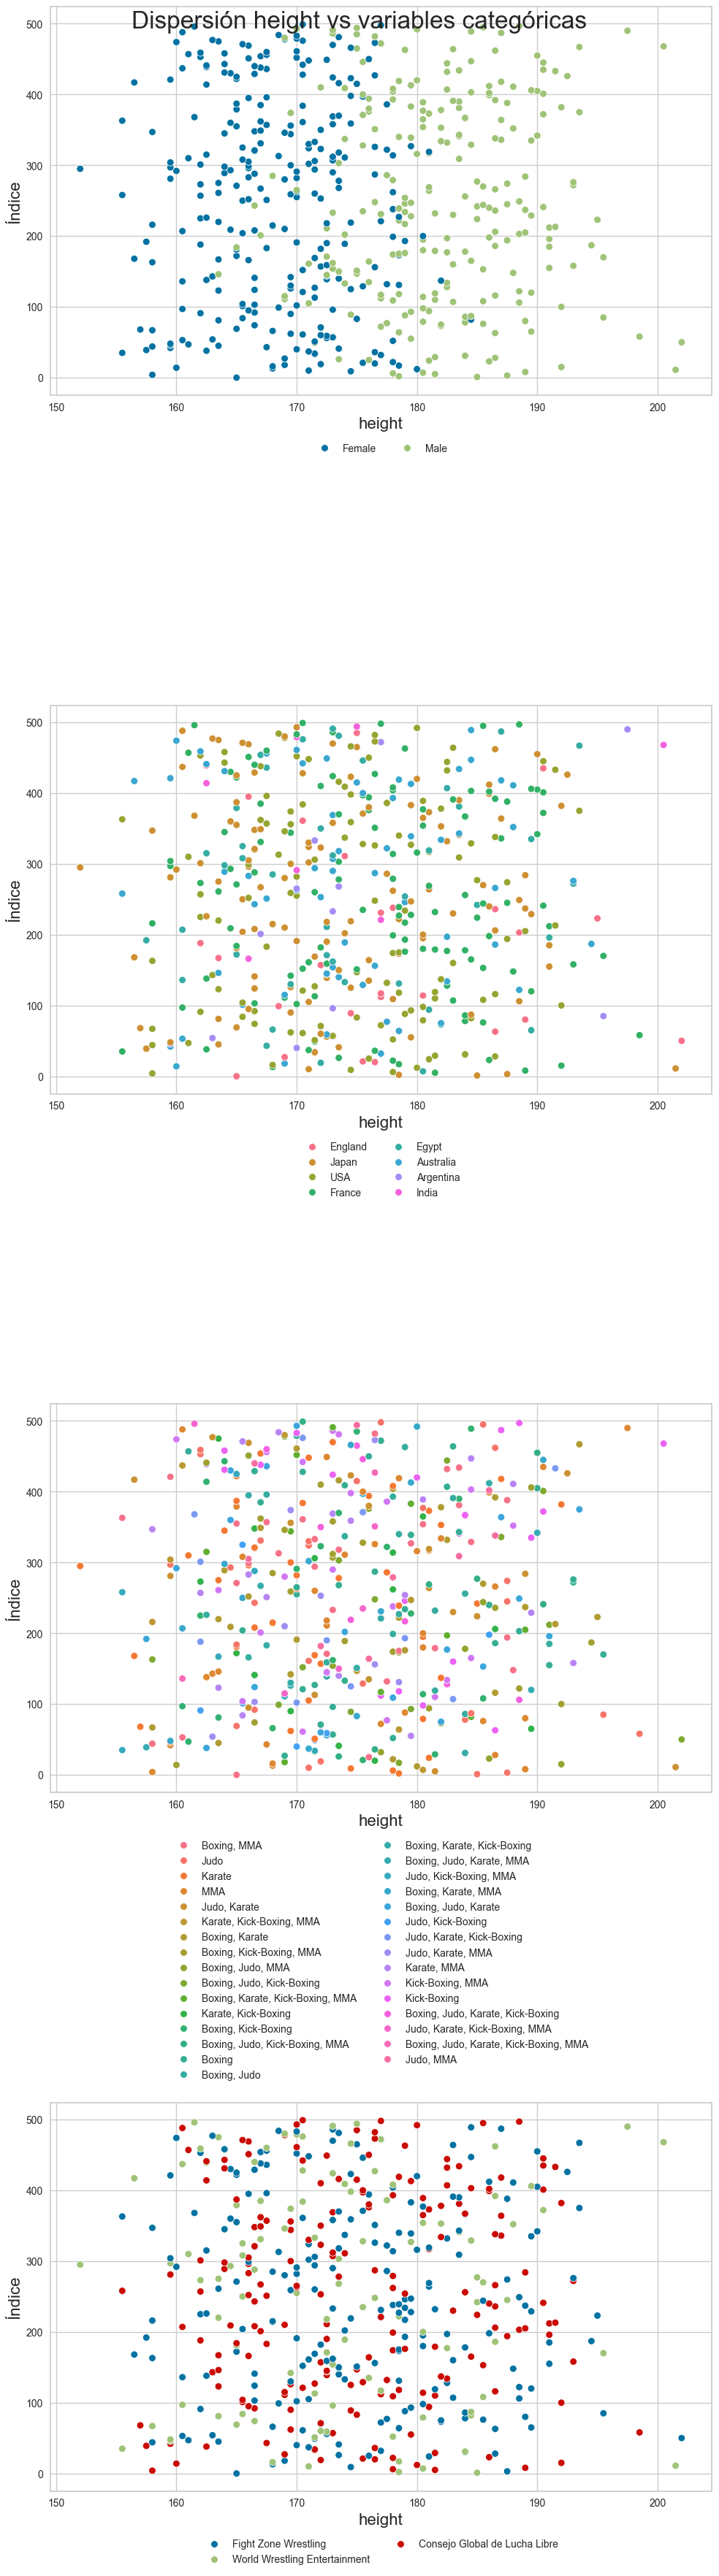

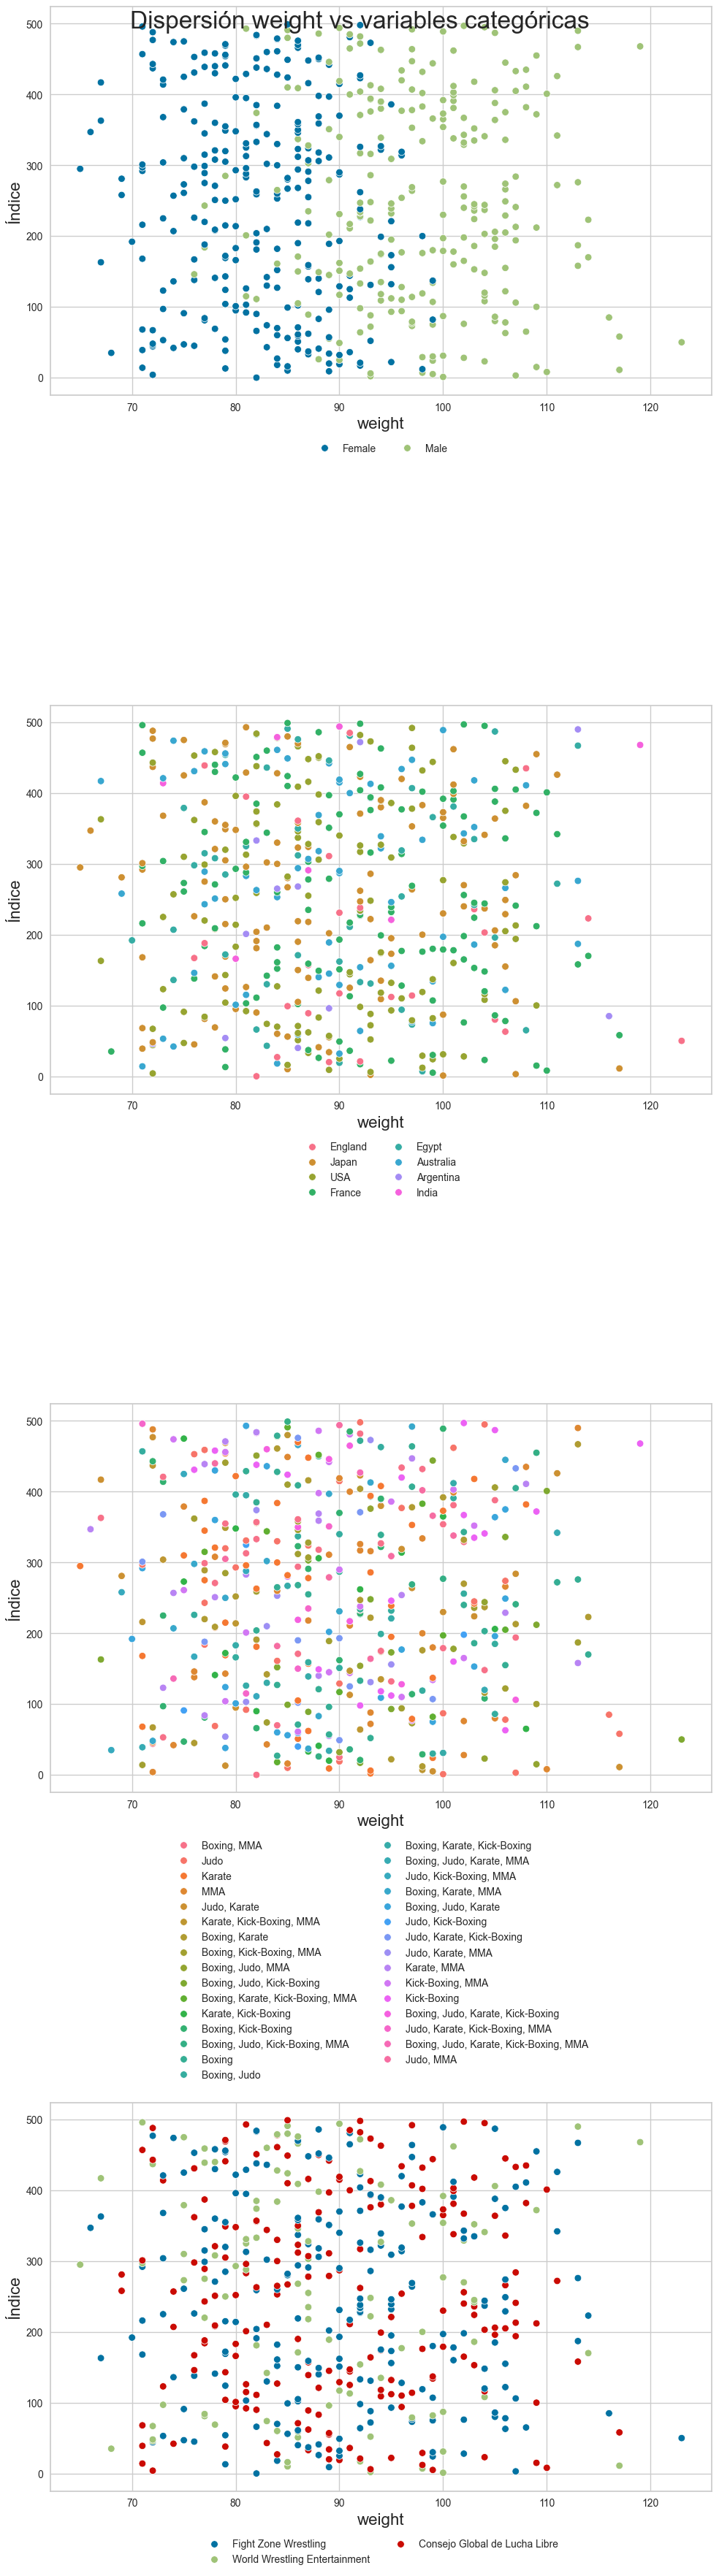

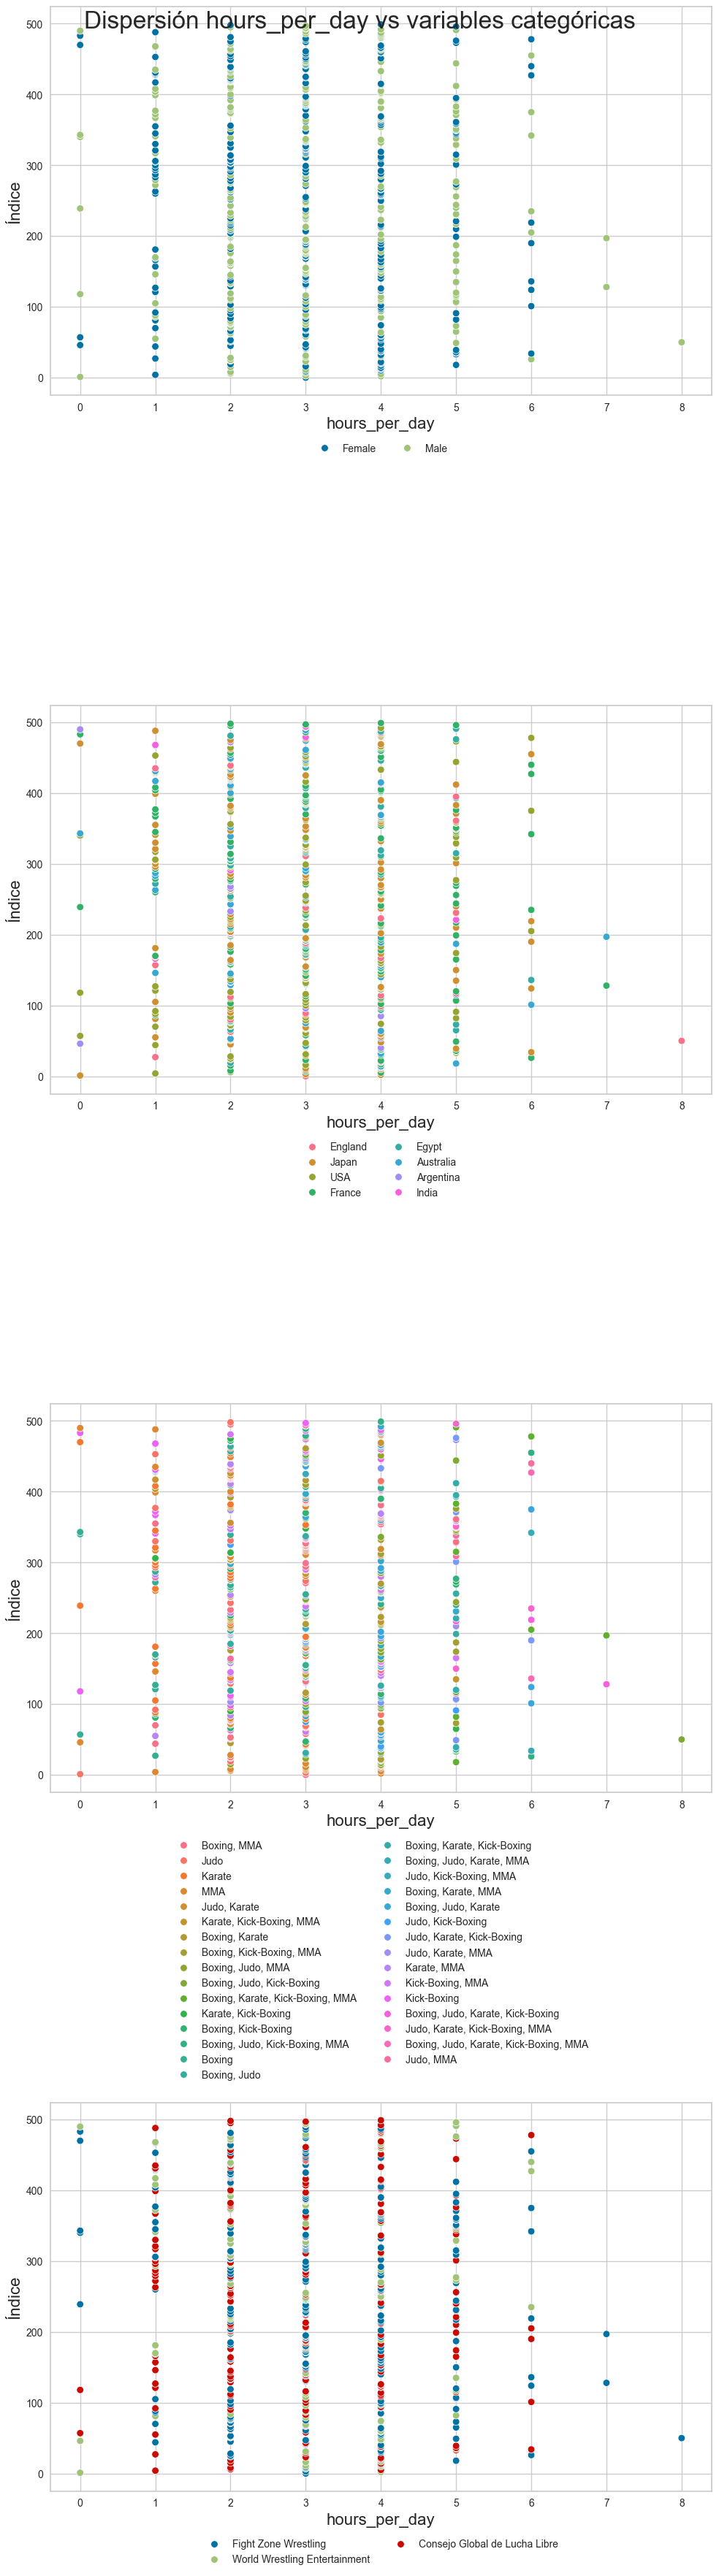

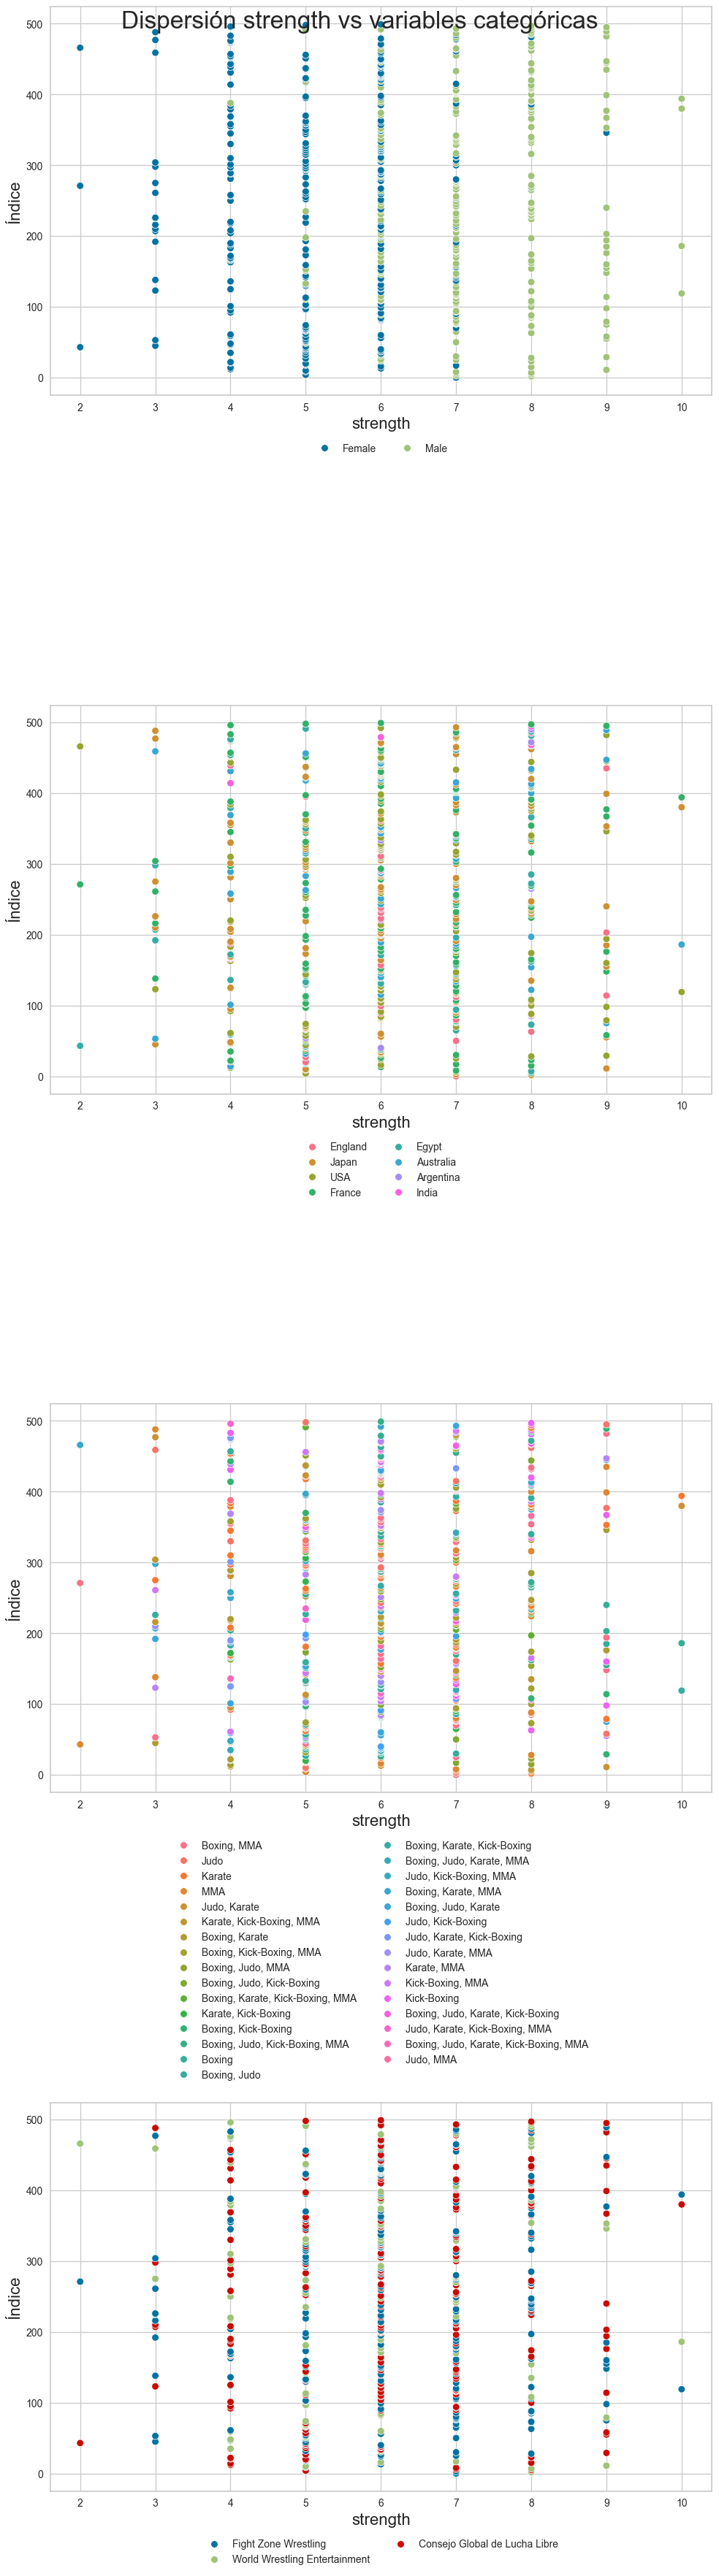

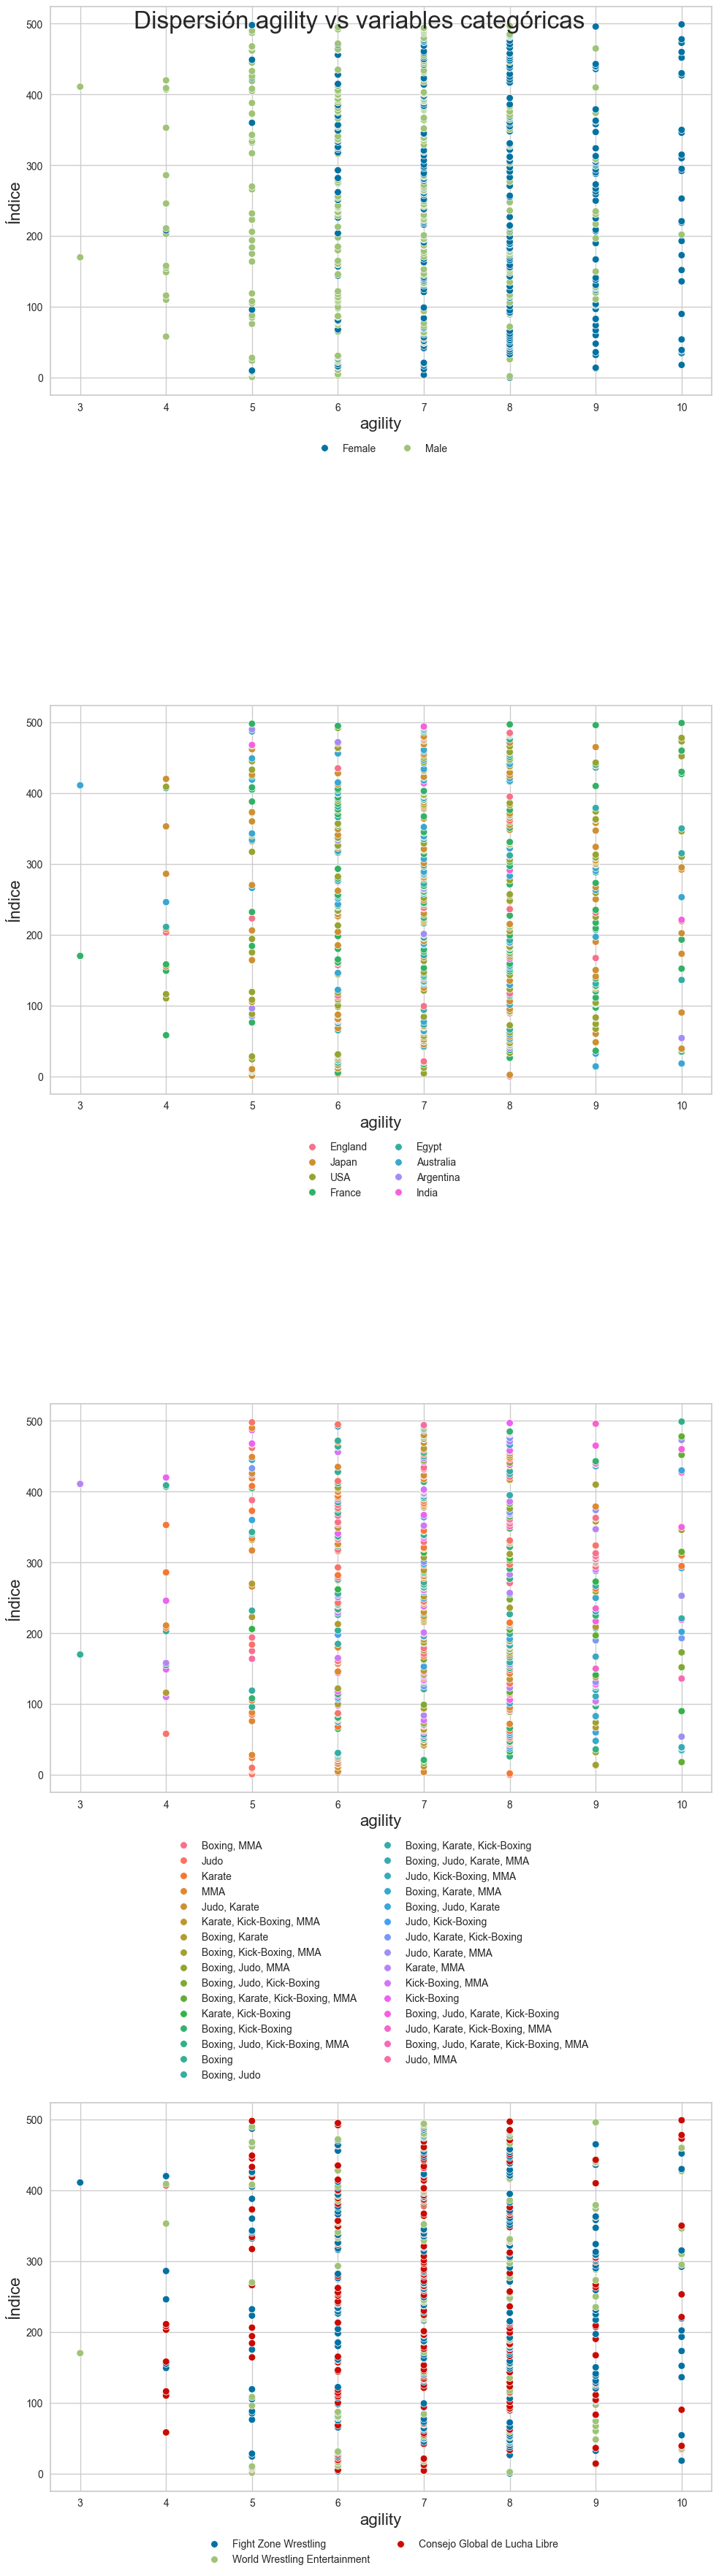

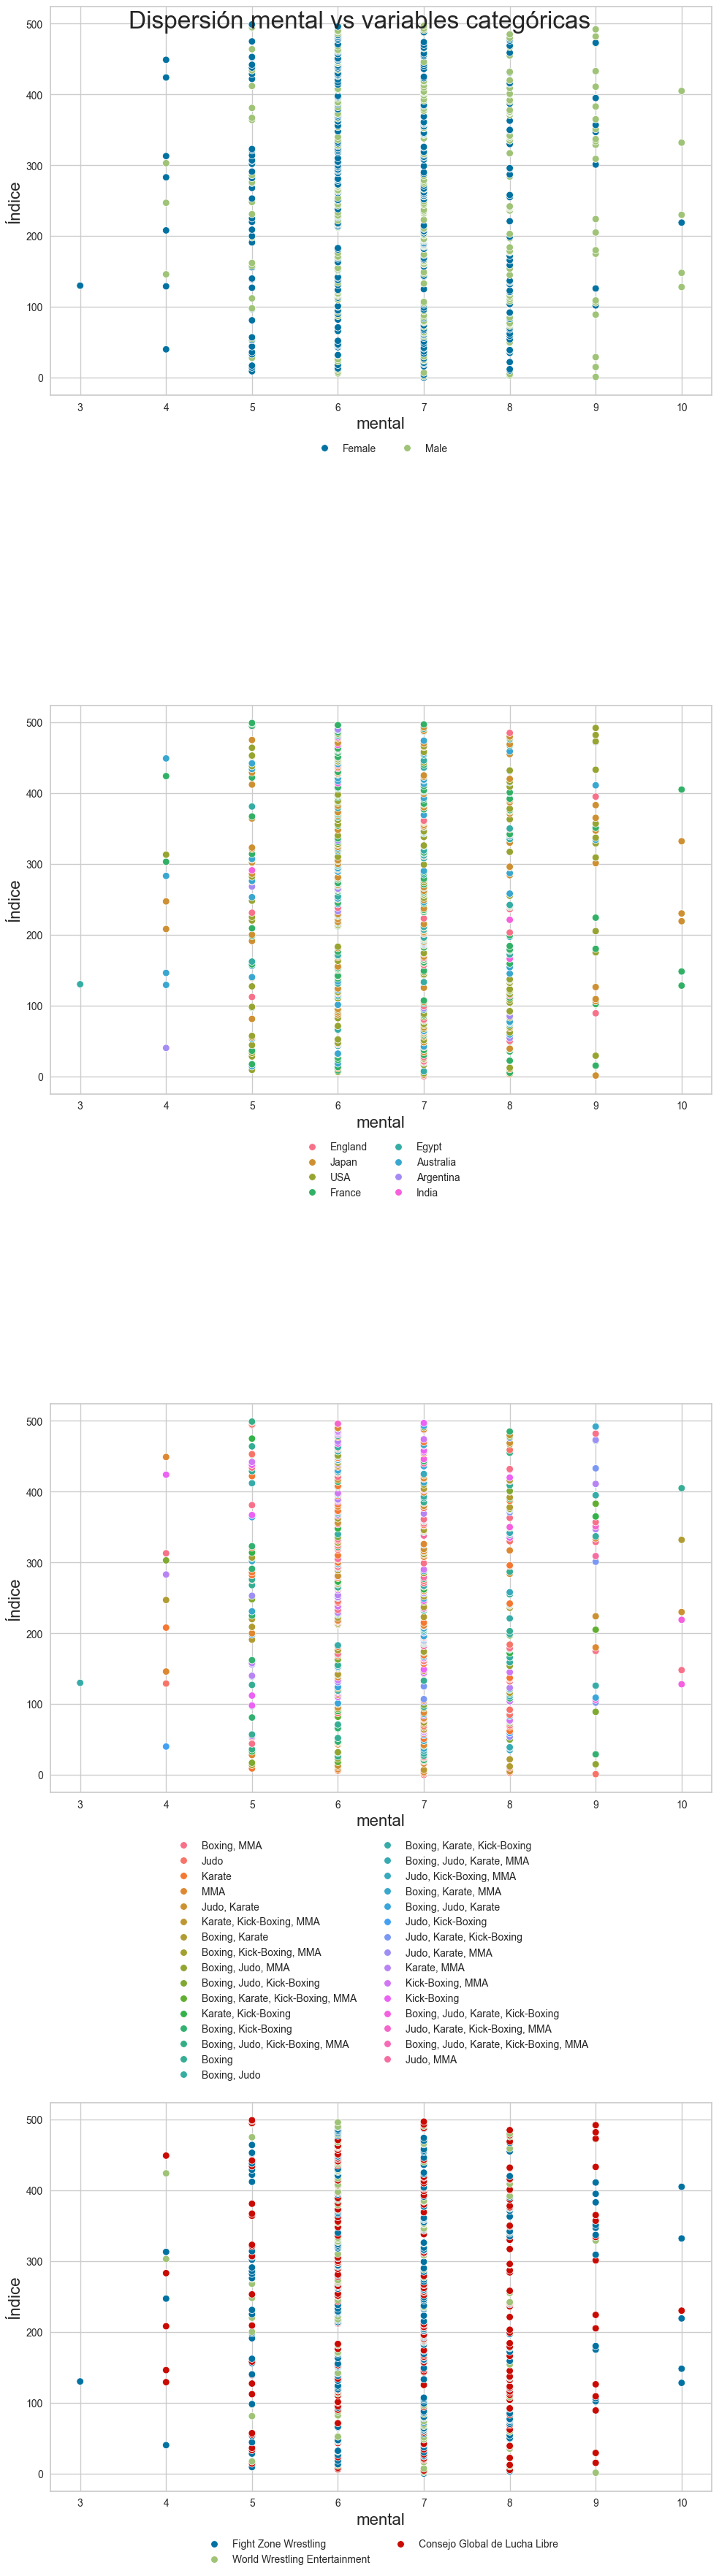

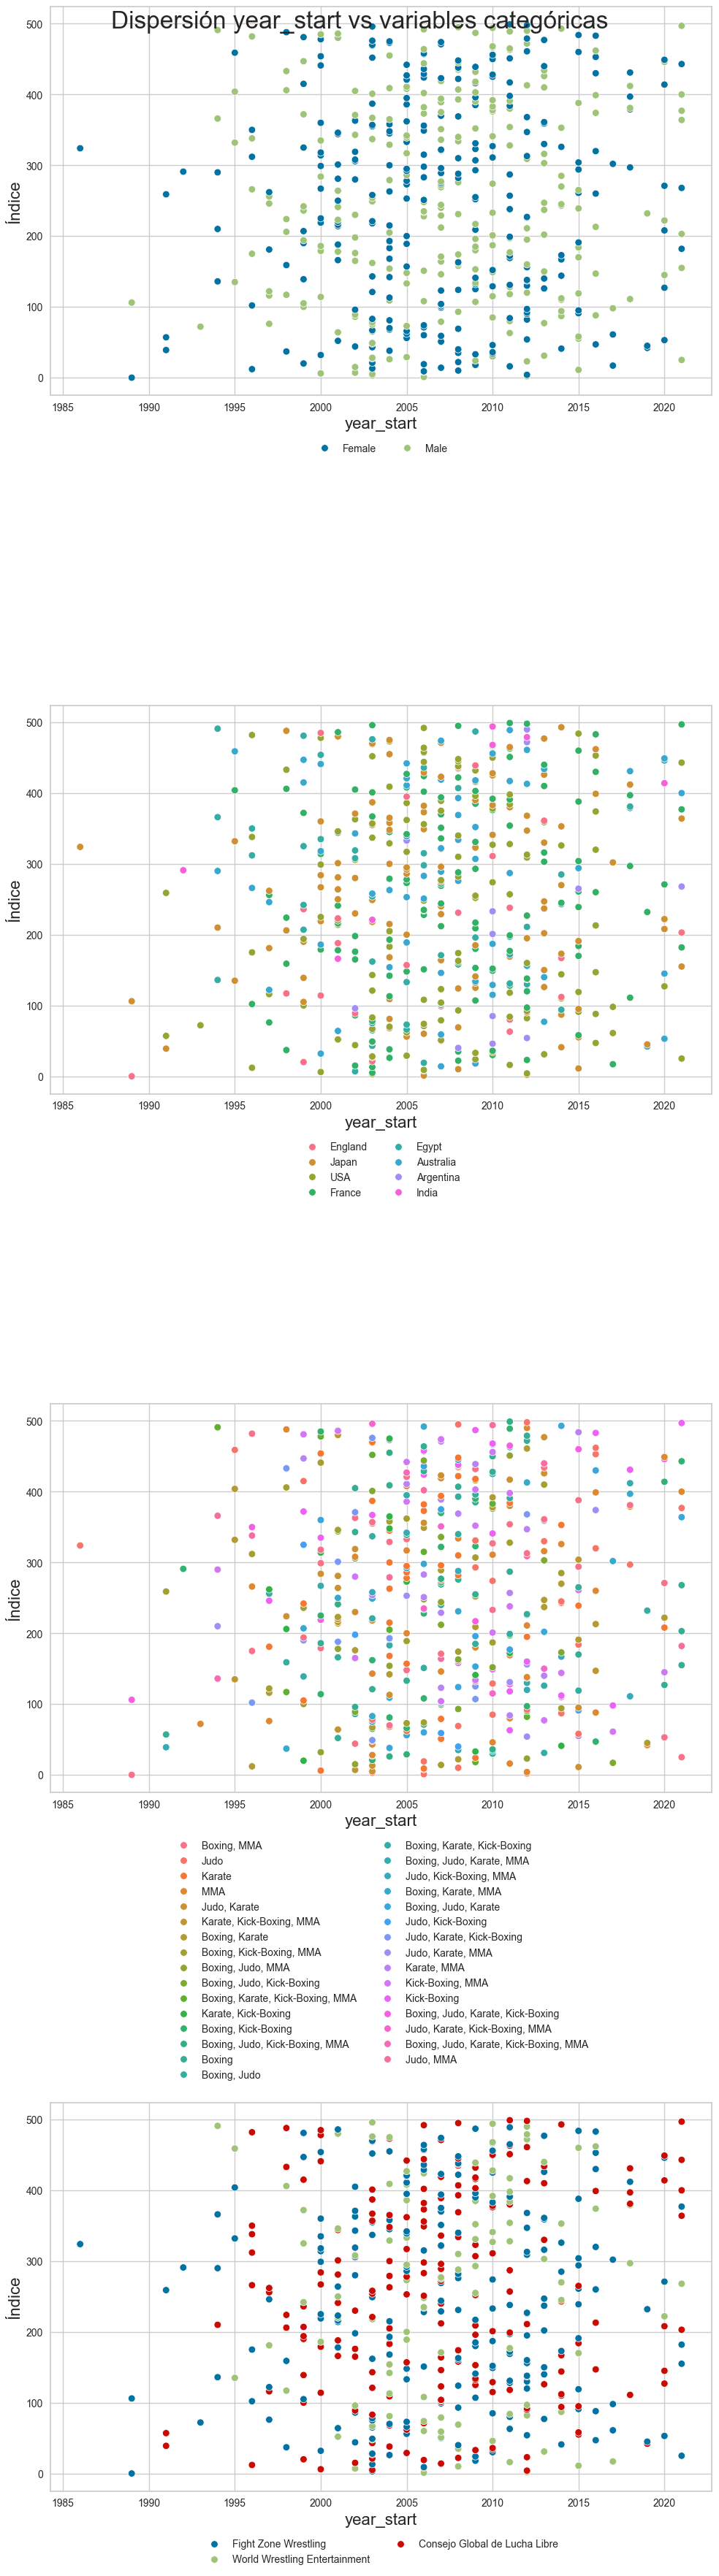

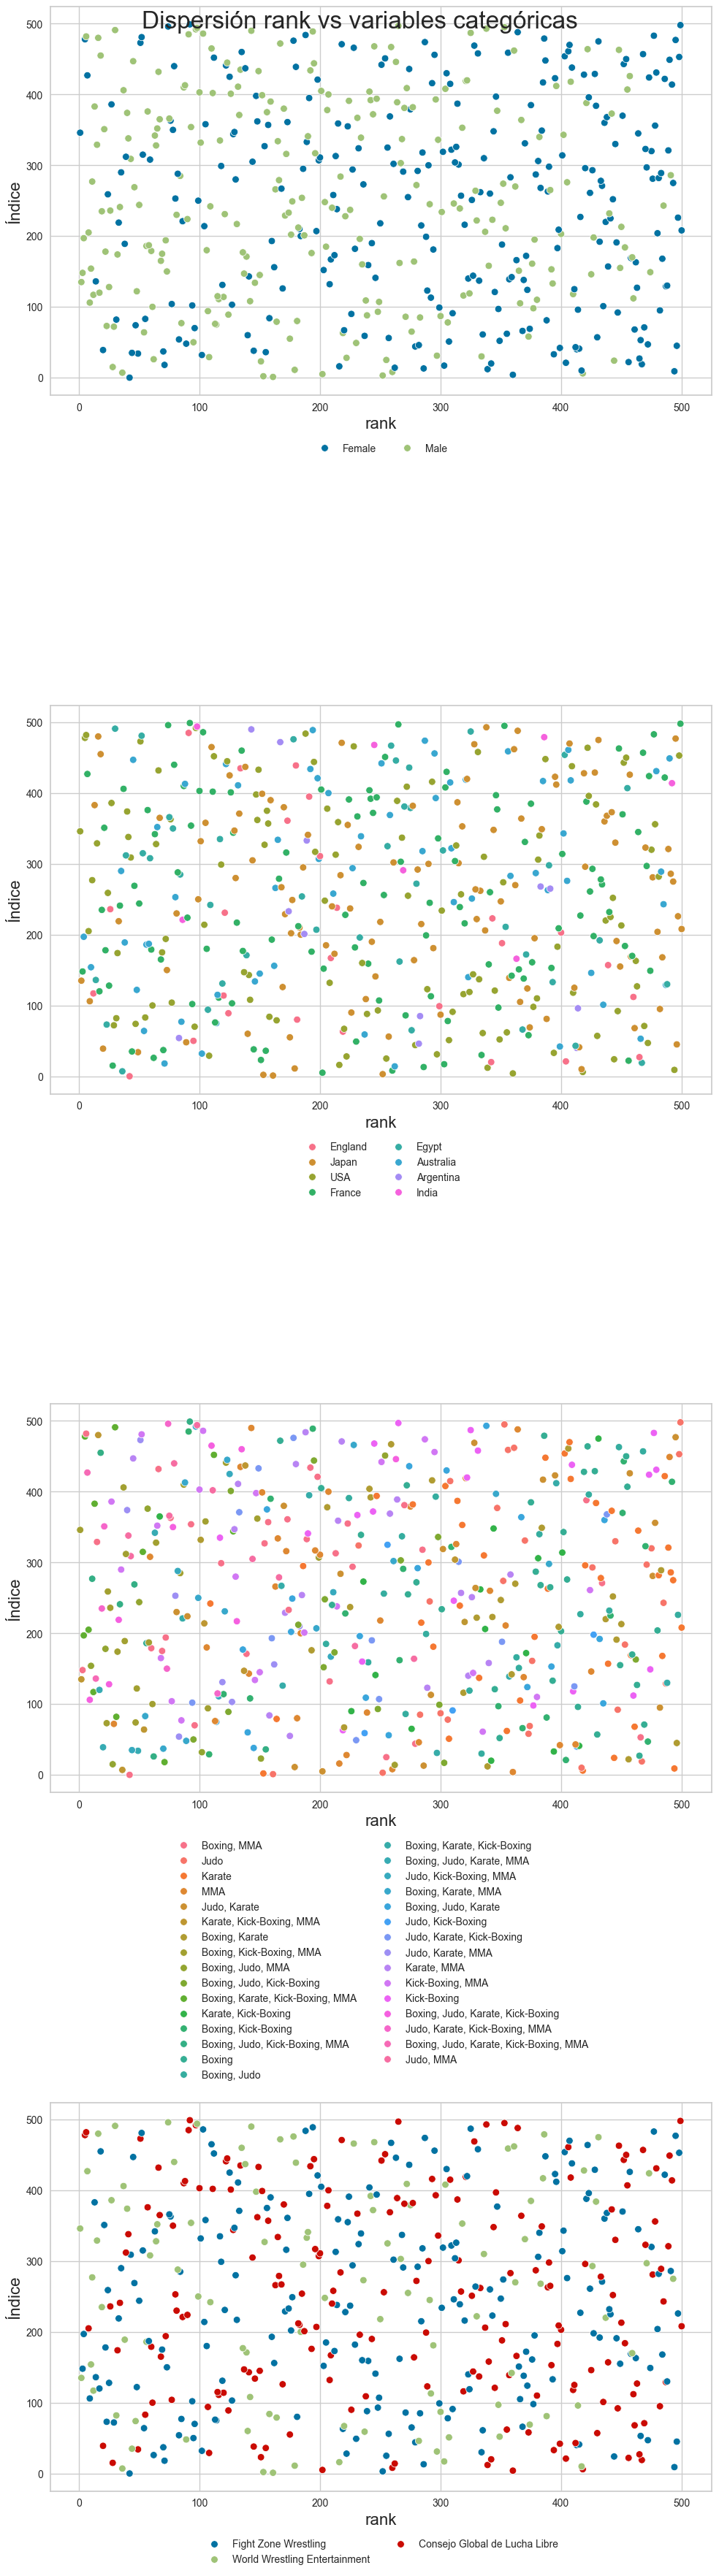

In [157]:
vis.visualizar_categoricas_numericas()

---
---
## Encoding

In [158]:
df_to_encode = df.copy()

preprocess = sup_clus.Preprocesado(df_to_encode)

df_encoded = preprocess.codificar()

df_encoded.head()

gender  age  height  nationality  weight  sports  hours_per_day  strength  \
0    0.53   41  165.00         0.05      82    0.06              3         7   
1    0.47   36  185.00         0.23     100    0.06              0         8   
2    0.47   29  178.50         0.23      93    0.08              4         8   
3    0.47   39  187.50         0.23     107    0.06              3         7   
4    0.53   29  158.00         0.23      72    0.07              1         5   

   agility  mental  federation  year_start  rank  
0        8       7        0.41        1989    42  
1        5       9        0.20        2006   161  
2        8       7        0.20        2012   153  
3        6       8        0.41        2003   252  
4        7       7        0.38        2012   360

---
---
## Estandarizacion

In [159]:
df_standardized = preprocess.estandarizar(escalador='robust')

df_standardized.head()

gender   age  height  nationality  weight  sports  hours_per_day  strength  \
0    0.00  1.25   -0.64        -1.71   -0.41    0.65           0.00      0.50   
1   -1.00  0.62    0.78         0.02    0.65    0.53          -1.50      1.00   
2   -1.00 -0.25    0.32         0.02    0.24    1.29           0.50      1.00   
3   -1.00  1.00    0.96         0.02    1.06    0.53           0.00      0.50   
4    0.00 -0.25   -1.13         0.00   -1.00    0.82          -1.00     -0.50   

   agility  mental  federation  year_start  rank  
0     0.50    0.00        1.00       -2.25 -0.84  
1    -1.00    1.00       -6.43       -0.12 -0.36  
2     0.50    0.00       -6.43        0.62 -0.39  
3    -0.50    0.50        1.00       -0.50  0.01  
4     0.00    0.00        0.00        0.62  0.44

---
---
## Clustering

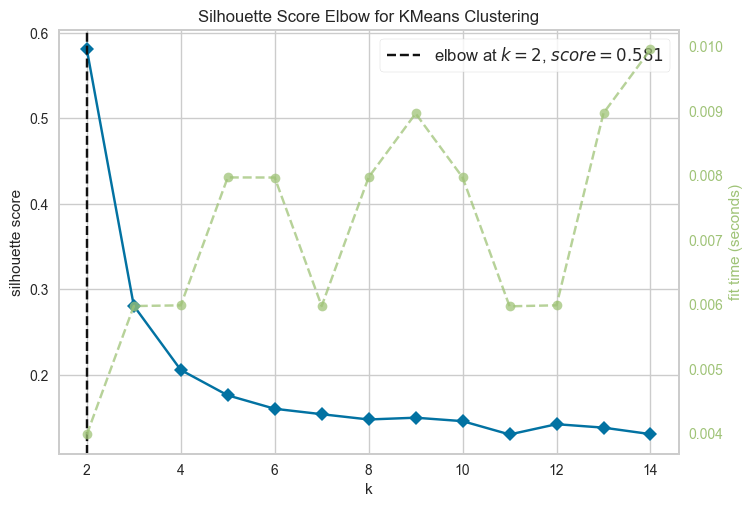

In [160]:
clustering = sup_clus.Clustering(df_standardized)

clustering.sacar_clusters_kmeans()

In [161]:
df_to_cluster = df_standardized.copy()
df_to_cluster2 = df_standardized.copy()

### Cluster 1

In [162]:
clustered_df, labels  = clustering.modelo_kmeans(df_to_cluster, 2)
clustering.calcular_metricas(labels=labels)

silhouette_score  davies_bouldin_index  cardinalidad
0              0.58                  0.65           398

In [163]:
clustered_df.head()

gender   age  height  nationality  weight  sports  hours_per_day  strength  \
0    0.00  1.25   -0.64        -1.71   -0.41    0.65           0.00      0.50   
1   -1.00  0.62    0.78         0.02    0.65    0.53          -1.50      1.00   
2   -1.00 -0.25    0.32         0.02    0.24    1.29           0.50      1.00   
3   -1.00  1.00    0.96         0.02    1.06    0.53           0.00      0.50   
4    0.00 -0.25   -1.13         0.00   -1.00    0.82          -1.00     -0.50   

   agility  mental  federation  year_start  rank clusters_kmeans  
0     0.50    0.00        1.00       -2.25 -0.84               0  
1    -1.00    1.00       -6.43       -0.12 -0.36               1  
2     0.50    0.00       -6.43        0.62 -0.39               1  
3    -0.50    0.50        1.00       -0.50  0.01               0  
4     0.00    0.00        0.00        0.62  0.44               0

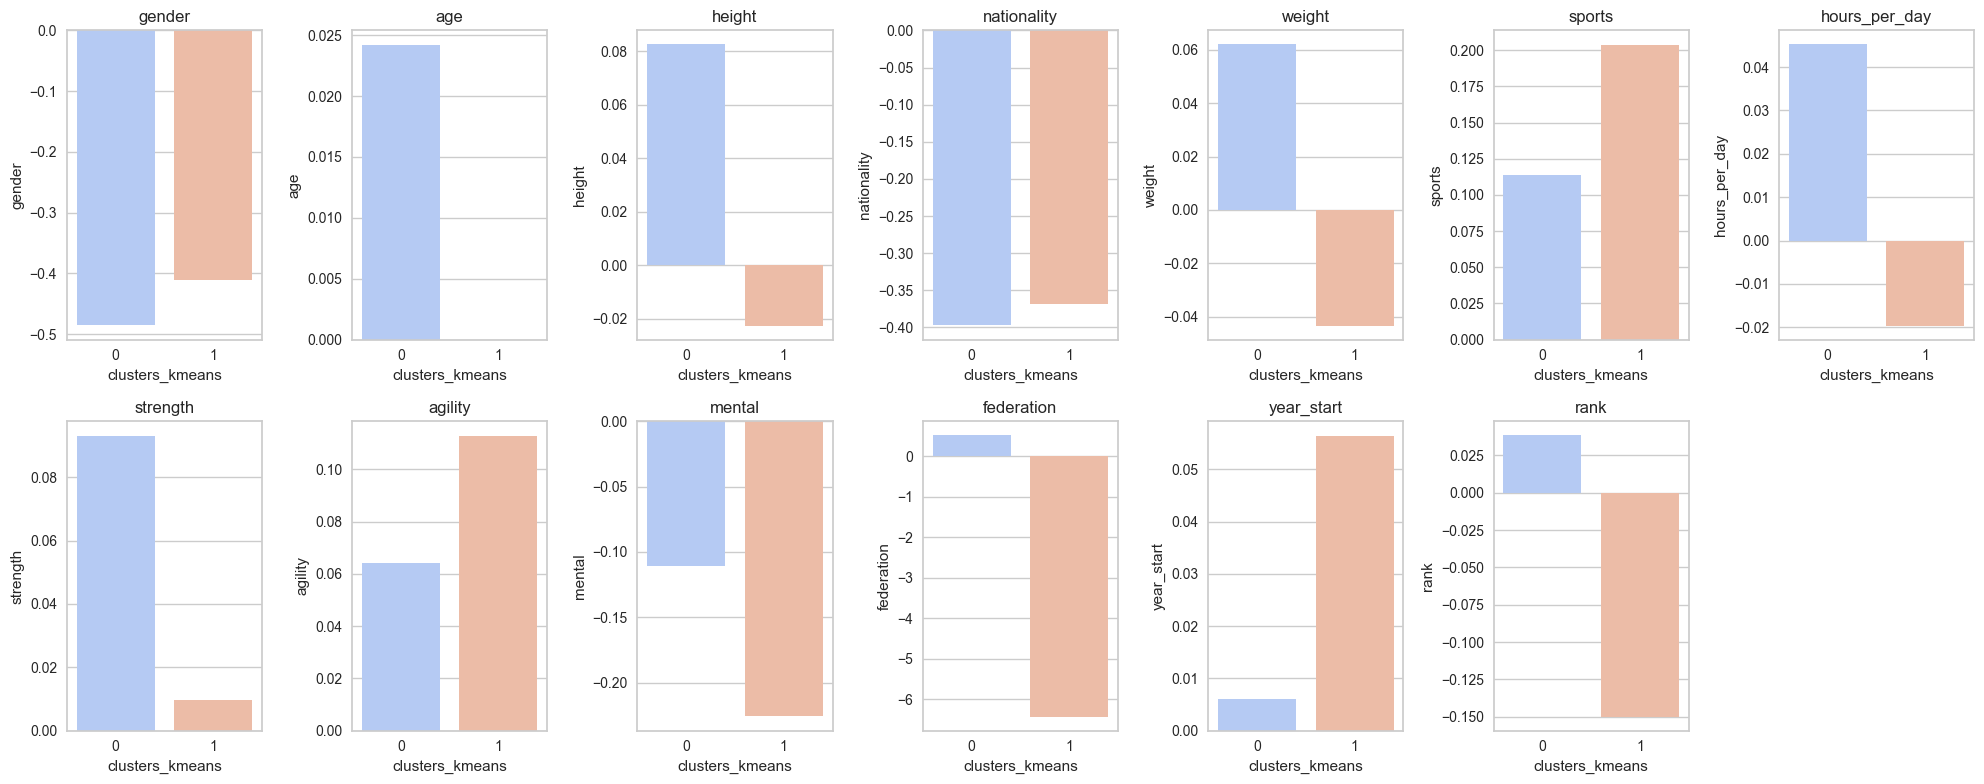

In [164]:
clustering.plot_clusters(clustered_df, columna_cluster='clusters_kmeans')

In [165]:
clustered_df.sample()

gender   age  height  nationality  weight  sports  hours_per_day  \
11   -1.00 -0.62    1.95         0.02    1.65   -0.12           0.00   

    strength  agility  mental  federation  year_start  rank clusters_kmeans  
11      1.50    -0.50   -0.50       -6.43        1.00 -0.29               1

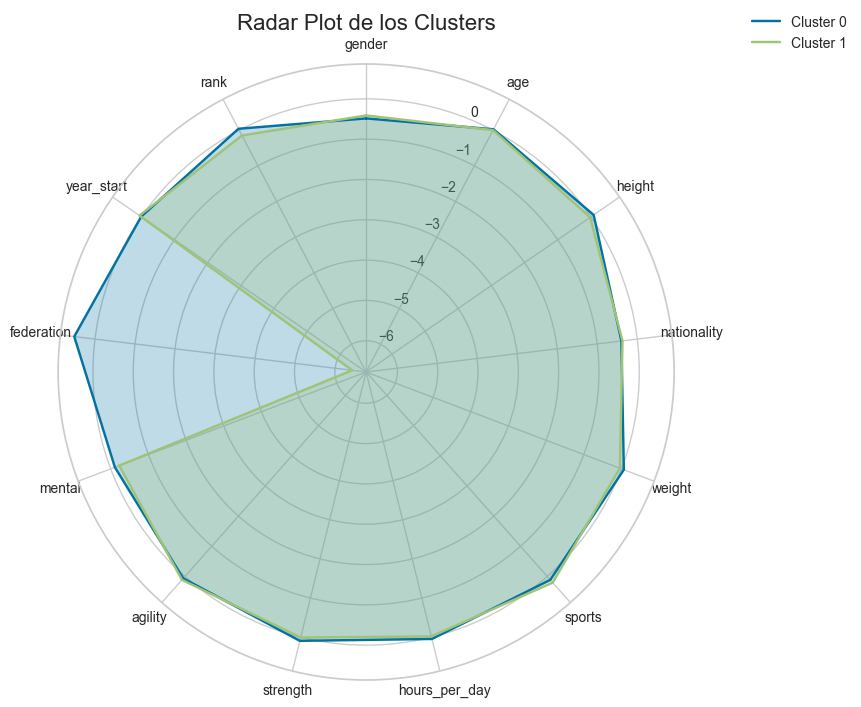

In [166]:
clustering.visualizar_radar_plot(clustered_df, 'clusters_kmeans', clustered_df.drop(columns=['clusters_kmeans']).columns)

In [167]:
clustering.calcular_configuraciones_vinculacion_distancia(df_to_cluster)

métrica    modelo  silhouette_score  clusters
12     cosine    KMeans              0.57         3
14     cosine    KMeans              0.51         4
16     cosine    KMeans              0.46         5
6   manhattan    KMeans              0.38         3
8   manhattan    KMeans              0.32         4
0   euclidean    KMeans              0.28         3
2   euclidean    KMeans              0.25         4
10  manhattan    KMeans              0.25         5
4   euclidean    KMeans              0.23         5
13     cosine  KMedoids              0.17         3
15     cosine  KMedoids              0.15         4
17     cosine  KMedoids              0.14         5
9   manhattan  KMedoids              0.11         4
1   euclidean  KMedoids              0.08         3
3   euclidean  KMedoids              0.06         4
7   manhattan  KMedoids              0.06         3
5   euclidean  KMedoids              0.05         5
11  manhattan  KMedoids              0.03         5

---
---
# Clustering Aglomerativo

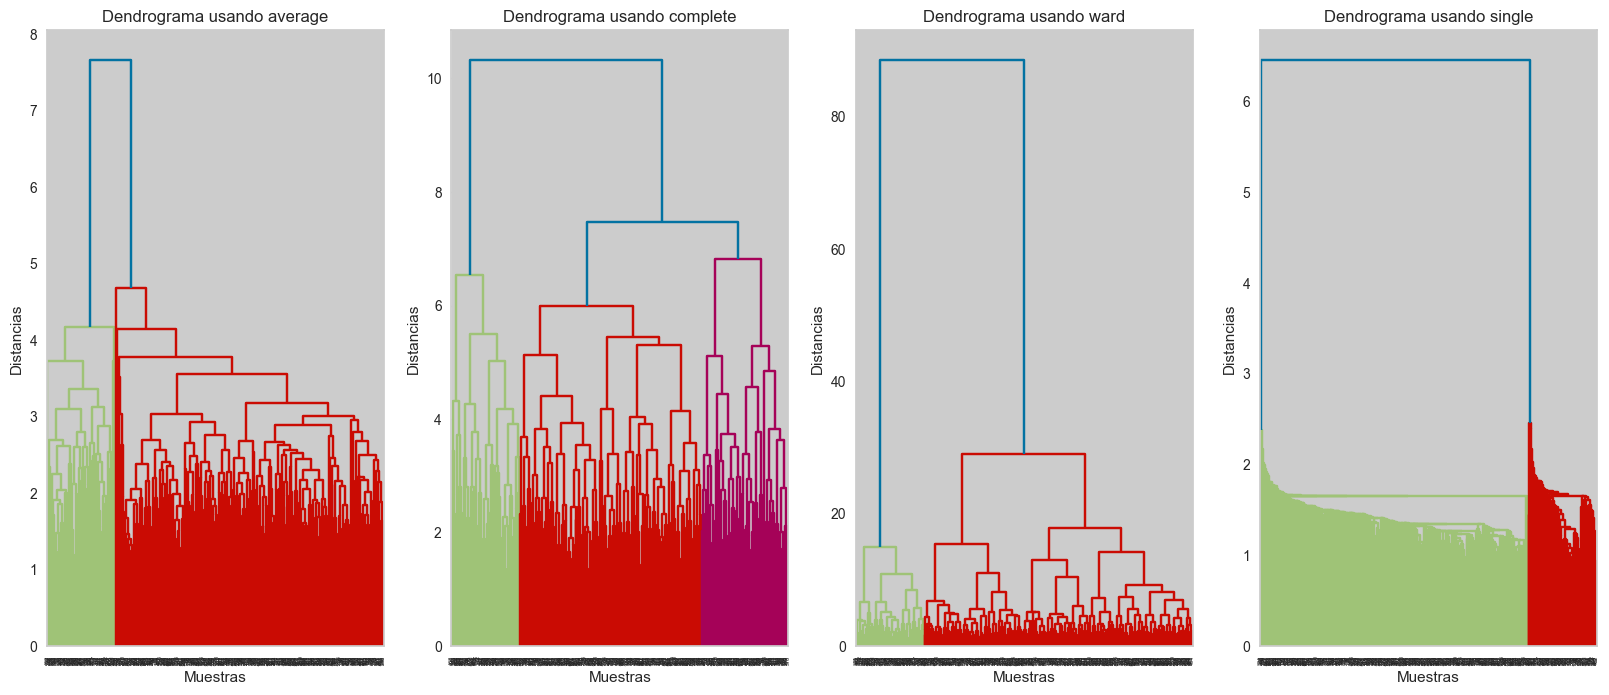

In [168]:
clustering.visualizar_dendrogramas()

---
---
## configuramos las distancias

In [169]:
df_to_cluster2.sample(3)

gender   age  height  nationality  weight  sports  hours_per_day  \
51     0.00  0.00   -0.18         0.00   -0.18    1.29          -0.50   
3     -1.00  1.00    0.96         0.02    1.06    0.53           0.00   
277   -1.00 -0.25    0.78         0.00    0.65   -0.76           1.00   

     strength  agility  mental  federation  year_start  rank  
51      -0.50     0.50    0.00       -6.43        0.00  0.23  
3        0.50    -0.50    0.50        1.00       -0.50  0.01  
277      0.50     0.50    0.00       -6.43        0.00 -0.96

In [170]:
clustering.calcular_confs_vinculacion_distancia_aglomerativo(df_to_cluster2)

Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric

linkage     metric  silhouette_score  davies_bouldin_index  \
9   complete     cosine              0.33                  1.94   
10  complete     cosine              0.31                  1.94   
11  complete     cosine              0.30                  2.02   
12  complete     cosine              0.30                  1.97   
13  complete     cosine              0.30                  2.00   
21      ward  euclidean              0.26                  1.49   
14  complete  chebyshev              0.23                  2.09   
22      ward  euclidean              0.22                  1.80   
0   complete  euclidean              0.22                  1.93   
23      ward  euclidean              0.20                  1.85   
7   complete     cosine              0.19                  2.34   
1   complete  euclidean              0.19                  1.63   
8   complete     cosine              0.16                  2.26   
24      ward  euclidean              0.13                  1.98   
26      ward  euclidean              0.13                  1.85   
25      ward  euclidean              0.12                  1.96   
27      ward  euclidean              0.12                  1.84   
15  complete  chebyshev              0.11                  2.34   
4   complete  euclidean              0.11                  2.08   
6   complete  euclidean              0.11                  2.01   

                                  cluster_cardinality  n_cluster  
9              {0: 104, 1: 90, 2: 146, 3: 53, 4: 107}          5  
10       {0: 90, 1: 57, 2: 146, 3: 53, 4: 107, 5: 47}          6  
11  {0: 62, 1: 57, 2: 146, 3: 53, 4: 107, 5: 47, 6...          7  
12  {0: 57, 1: 53, 2: 146, 3: 21, 4: 107, 5: 47, 6...          8  
13  {0: 146, 1: 53, 2: 28, 3: 21, 4: 107, 5: 47, 6...          9  
21                           {0: 252, 1: 102, 2: 146}          3  
14                           {0: 102, 1: 297, 2: 101}          3  
22                    {0: 146, 1: 102, 2: 153, 3: 99}          4  
0                            {0: 128, 1: 102, 2: 270}          3  
23              {0: 102, 1: 99, 2: 153, 3: 89, 4: 57}          5  
7                             {0: 157, 1: 90, 2: 253}          3  
1                      {0: 102, 1: 69, 2: 270, 3: 59}          4  
8                      {0: 253, 1: 90, 2: 104, 3: 53}          4  
24        {0: 153, 1: 99, 2: 75, 3: 89, 4: 57, 5: 27}          6  
26  {0: 89, 1: 63, 2: 75, 3: 115, 4: 57, 5: 27, 6:...          8  
25  {0: 99, 1: 89, 2: 75, 3: 115, 4: 57, 5: 27, 6:...          7  
27  {0: 75, 1: 63, 2: 52, 3: 115, 4: 57, 5: 27, 6:...          9  
15                     {0: 297, 1: 78, 2: 101, 3: 24}          4  
4   {0: 152, 1: 69, 2: 118, 3: 59, 4: 17, 5: 55, 6...          7  
6   {0: 69, 1: 59, 2: 118, 3: 34, 4: 17, 5: 55, 6:...          9